In [79]:
#hipotésis 1
#los ataques tiburones en pesca son más mortíferos en verano
#hipotésis 2
#los casos de ataques de tiburones a mujeres haciendo snorquel ha subido durante las 3 últimas décadas
#hipotésis 3
#los tiburones blancos tienden a atacar a niños y adolescentes

In [26]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [27]:
at=pd.read_csv("../sharks_depurado.csv",encoding = "ISO-8859-1")
fish=pd.read_csv("../fishing.csv",encoding = "ISO-8859-1")

In [28]:
fig = px.scatter_matrix( at, dimensions=['activity2','fatal','franja_edad'], color="sex",width=1000, height=800) 
fig.show()

In [29]:
#hipotésis 1
#los ataques tiburones en pesca son más mortíferos en verano

In [30]:
agrupado = at.groupby(["activity2"])["seasons"].value_counts().unstack()
agrupado
#para poder comprobar la hipotésis agrupo los datos por estaciones

seasons,autumn,spring,summer,unknown,winter
activity2,,,,,
Fell overboard,7.0,8.0,8.0,6.0,3.0
Kayaking,11.0,4.0,9.0,NaN,9.0
Snorkeling,30.0,16.0,21.0,3.0,19.0
Standing,13.0,26.0,37.0,7.0,16.0
Treading water,6.0,7.0,4.0,NaN,15.0
Wading,18.0,38.0,62.0,6.0,25.0
bath,42.0,43.0,36.0,19.0,49.0
boating,22.0,21.0,23.0,11.0,17.0
body_board,17.0,23.0,18.0,NaN,11.0


#en el gráfico 1 podemos ver que hasta la fecha hay una mayor concentración de ataques en pesca en verano

In [31]:
activity= at.activity2.unique()
G1 = go.Figure(data=[
    go.Bar(name="summer", x=activity, y=agrupado.summer),
    go.Bar(name="autumn", x=activity, y=agrupado.autumn),
    go.Bar(name="spring", x=activity, y=agrupado.spring),
    go.Bar(name="winter", x=activity, y=agrupado.winter),
    
])
G1.show()

<AxesSubplot:xlabel='an', ylabel='Count'>

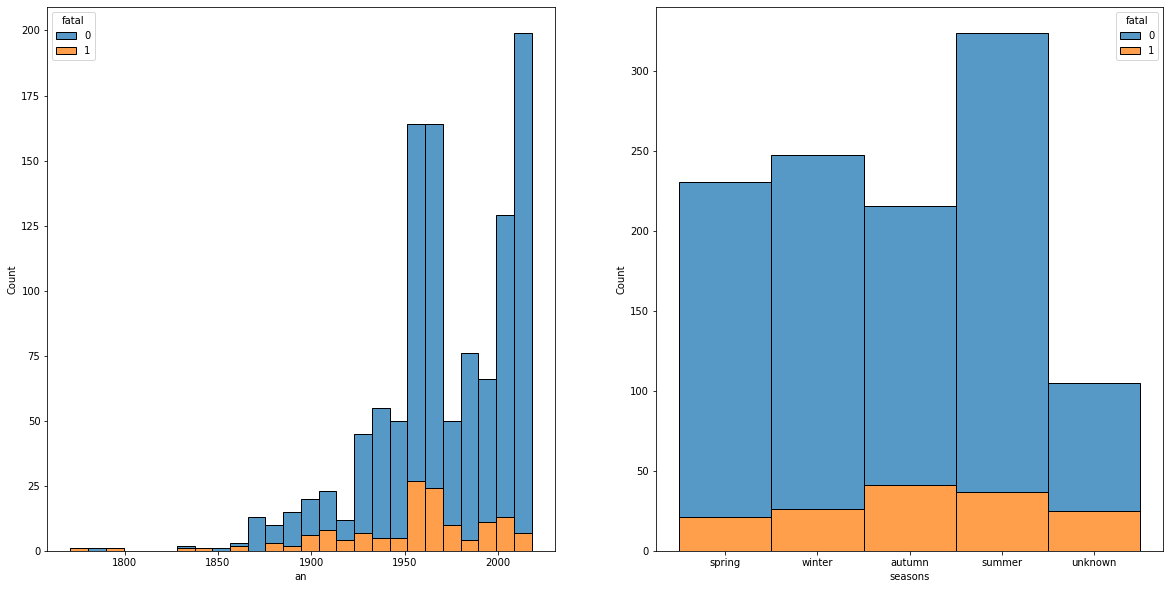

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.histplot(data=fish, x="an", hue="fatal", multiple="stack", ax=axs[0])
sns.histplot(data=fish, x="seasons", hue="fatal", multiple="stack", bins=10, ax=axs[1])



In [33]:
""" sin embargo los ataques de tiburones en pesca son más mortíferos en otoño de acuerdo al histórico de datos. Adicionalmente también podemos ver que en los últimos 10 años han subido los casos de ataques de tiburones pero no su mortalidad."""  

' sin embargo los ataques de tiburones en pesca son más mortíferos en otoño de acuerdo al histórico de datos. Adicionalmente también podemos ver que en los últimos 10 años han subido los casos de ataques de tiburones pero no su mortalidad.'

In [34]:
"""Por lo tanto, la hipotésis nº1 no es correcta: en verano la mortalidad no es más alta en verano"""

'Por lo tanto, la hipotésis nº1 no es correcta: en verano la mortalidad no es más alta en verano'

In [35]:
# hipotésis 2: los ataques de tiburones a mujeres haciendo snorkel se han incrementado en la última década

In [36]:
fig3 = px.bar(at, x=at.activity2.value_counts().index, y=at.activity2.value_counts().values)
fig3.show()

In [39]:
sno=at[(at.sex=="female")&(at.activity2=="Snorkeling")]
#para facilitar el uso de los datos, creo un nuevo dataframe con los datos que necesito para confirmar la hipótesis

In [40]:
sno.head()

,Unnamed: 0,casenumber,date,year,type,country,area,location,activity,name,...,fatal,fecha,aÃ±o,mes,dia,seasons,edad,especies,franja_edad,an
56,56,2017.12.09,09-Dec-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Snorkeling,Sarah Illig-Carroll,...,0,2017.12.09,2017,12,9.0,autumn,25.0,nurse shark,young_adult,2017
75,75,2017.10.05,05-Oct-2017,2017.0,Unprovoked,USA,Hawaii,"KamaÂole Beach Park, Maui",Snorkeling,female,...,0,2017.10.05,2017,10,5.0,autumn,40.0,other,adult,2017
103,103,2017.08.05,05-Aug-2017,2017.0,Unprovoked,EGYPT,Red Sea Protectorate,Marsa Ghalib,Snorkeling,Kirsten Schachinger,...,0,2017.08.05,2017,08,5.0,summer,20.0,white shark,young_adult,2017
109,109,2017.07.27,27-Jul-2017,2017.0,Unprovoked,BAHAMAS,New Providence District,Rose Island,Snorkeling,female,...,0,2017.07.27,2017,07,27.0,summer,NaN,other,NaN,2017
138,138,2017.06.02,02-Jun-2017,2017.0,Unprovoked,BAHAMAS,New Providence,Athol Island,Snorkeling,Tiffany Johnson,...,0,2017.06.02,2017,06,2.0,spring,32.0,tiger shark,young_adult,2017


In [87]:
agrupado2 = sno.groupby(["an"])["activity2"].value_counts().unstack()
#para poder comprobar la hipotésis agrupo los datos por años


In [61]:
year= sno.an.unique()
G4 = go.Figure(data=[
    go.Bar(name="Snorkeling accident", x=agrupado2.index, y=agrupado2.Snorkeling),
   
    ])
G4.show()

In [63]:
 """el el gráfico4 podemos ver que la hipótesis 2 es correcta: durante los últimos 10 años los ataques de tiburones a mujeres haciendo esnorkel han aumentado"""

'el el gráfico podemos ver que la hipótesis 2 es correcta: durante los últimos 10 años los ataques de tiburones a mujeres haciendo esnorkel han aumentado'

In [ ]:
#hipotésis 3
#los tiburones blancos tienden a atacar a personas jóvenes

In [66]:
ws=at[(at.especies=="white shark")]
#para facilitar el uso de los datos, creo un nuevo dataframe con los datos que necesito para confirmar la hipótesis

In [88]:
fig6 = px.pie(ws, values=ws.franja_edad.value_counts().values, names=ws.franja_edad.value_counts().index )
fig6.show()


In [84]:
 """el el gráfico6 podemos ver que la hipótesis 3 es incorrecta: se han registrado más ataques de tiburones blancos a jóvenes adultos (de entre 20 y 35 años) que a niños y adolescentes"""

'el el gráfico6 podemos ver que la hipótesis 3 es incorrecta: se han registrado más ataques de tiburones blancos a jóvenes adultos (de entre 20 y 35 años) que a niños y adolescentes'